# Importing/ Installing Packages

In [1]:
# Packages/Libraries

# Data Manipulation
import numpy as np
from numpy import loadtxt
import pandas as pd
import os #Provides function for interacting with operating system
import random
import copy
from glob import glob
import re 

# Plotting graphs
import matplotlib.pyplot as plt
import pandas
plt.style.use('fivethirtyeight')
import seaborn as sns

# Technical Indicators
import talib as ta

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier,XGBRegressor

# Loading the Raw data

In [2]:
path_list = glob(r'C:\Users\harit\Desktop\XGB\*.txt')

In [4]:
list_df = []
for file_ in path_list:
    Label = re.sub('^.*\\\\', '',file_).split('.')[0]
    temp_file = pd.read_csv(file_)
    temp_file.loc[:,'Label']= Label
    list_df.append(temp_file)

In [5]:
final_file = pd.concat(list_df)

In [6]:
df = final_file.copy()

In [7]:
print(df)

            Date    Open    High     Low   Close    Volume  OpenInt Label
0     1999-11-18  30.713  33.754  27.002  29.702  66277506        0     a
1     1999-11-19  28.986  29.027  26.872  27.257  16142920        0     a
2     1999-11-22  27.886  29.702  27.044  29.702   6970266        0     a
3     1999-11-23  28.688  29.446  27.002  27.002   6332082        0     a
4     1999-11-24  27.083  28.309  27.002  27.717   5132147        0     a
...          ...     ...     ...     ...     ...       ...      ...   ...
4516  2017-11-06  68.220  68.450  68.220  68.220    995731        0     a
4517  2017-11-07  68.320  68.640  68.040  68.250    966466        0     a
4518  2017-11-08  68.100  68.330  67.771  68.110    972616        0     a
4519  2017-11-09  67.920  67.980  66.910  67.470   1673083        0     a
4520  2017-11-10  67.350  67.580  66.700  66.810   1704549        0     a

[4521 rows x 8 columns]


In [8]:
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt,Label
0,1999-11-18,30.713,33.754,27.002,29.702,66277506,0,a
1,1999-11-19,28.986,29.027,26.872,27.257,16142920,0,a
2,1999-11-22,27.886,29.702,27.044,29.702,6970266,0,a
3,1999-11-23,28.688,29.446,27.002,27.002,6332082,0,a
4,1999-11-24,27.083,28.309,27.002,27.717,5132147,0,a


In [ ]:
print(df.shape)
df['Date'] = pd.to_datetime(df['Date'])
df.Date.dtype

# Data Visualization

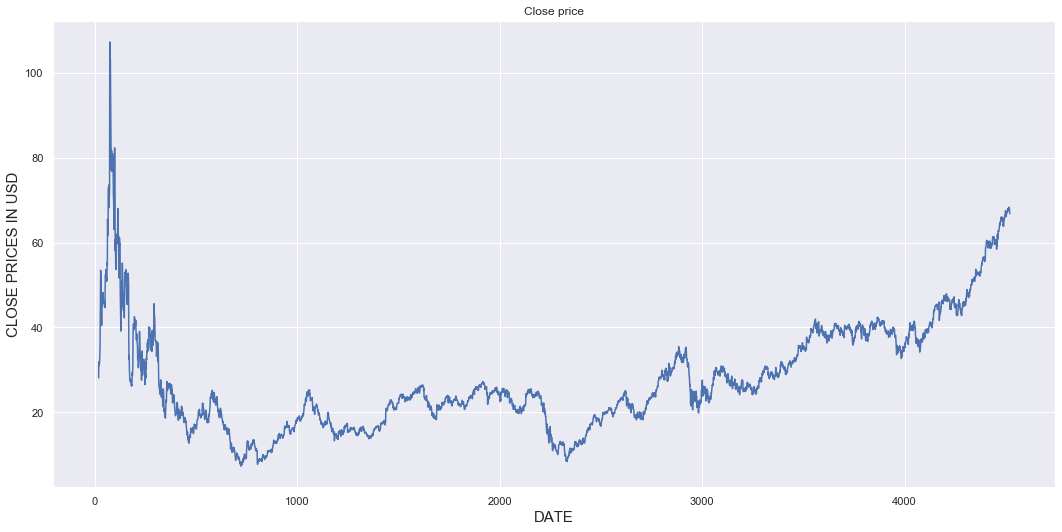

In [78]:
# Data Visualization for Closing price
plt.figure(figsize=(16,8))
plt.title('Close price')
plt.plot(df.loc[df.Label=='a', 'Close'])
plt.xlabel('DATE',fontsize=15)
plt.ylabel('CLOSE PRICES IN USD', fontsize=15)
plt.show()

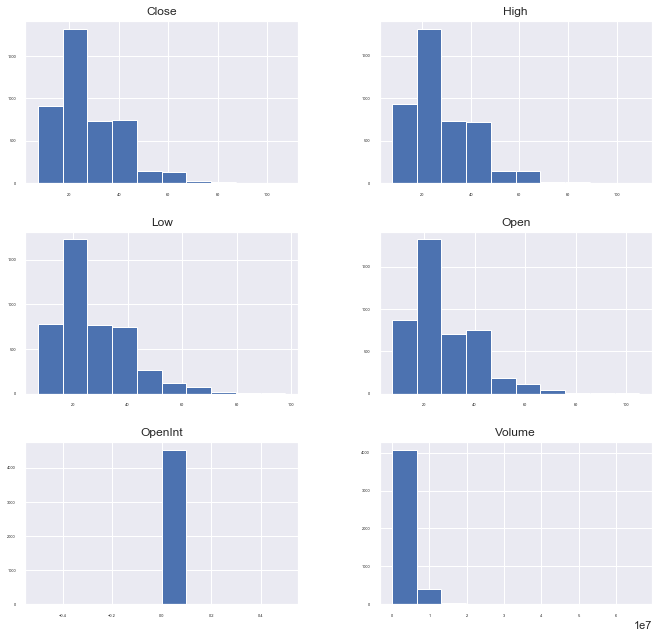

In [13]:
#Plot a histogram for all the columns of the dataframe. This shows the frequency of values in all the columns
sns.set()
df.hist(sharex = False, sharey = False, xlabelsize = 4, ylabelsize = 4, figsize=(10, 10))
plt.show()

# Data Analysis & Data Cleaning

In [16]:
#Data Preprocessing - Exploring Data Analysis & Data Cleaning
# Checking for null values
df.isnull().sum()

#Define Predictor/Independent Variables
#We are using 10-days moving average, correlation, relative strength index (RSI),
#the difference between the open price of yesterday and today, 
#difference close price of yesterday and the open price of today, open, high, low, and 
#close price as indicators to make the prediction.
df['S_10_Close'] = df['Close'].rolling(window=10).mean()
df['S_10_High'] = df['High'].rolling(window=10).mean()
df['S_10_Low'] = df['Low'].rolling(window=10).mean()

df['Corr_Close'] = df['Close'].rolling(window=10).corr(df['S_10_Close'])
df['Corr_High'] = df['High'].rolling(window=10).corr(df['S_10_High'])
df['Corr_Low'] = df['Low'].rolling(window=10).corr(df['S_10_Low'])

df['RSI_Close'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['RSI_High'] = ta.RSI(np.array(df['High']), timeperiod =10)
df['RSI_Low'] = ta.RSI(np.array(df['Low']), timeperiod =10)

df['Open_Close'] = df['Open'] - df['Close'].shift(1)
df['Close_Close'] = df['Close'] - df['Close'].shift(1)
#df['Close_Next'] = df['Close'] - df['Close'].shift(-1)
df['Open_Open'] = df['Open'] - df['Open'].shift(1)
df['Volume_Diff'] = df['Volume'].shift(1) - df['Volume']
df['High_Diff'] = df['High'].shift(1)-df['High']
df['Low_Diff'] = df['Low'].shift(1)-df['Low']
df.dropna(inplace=True)
df.reset_index
df.drop('OpenInt', axis=1)
X = df.copy()

In [113]:
X

,S_10_Close,S_10_High,S_10_Low,Corr_Close,Corr_High,Corr_Low,RSI_Close,RSI_High,RSI_Low,Open_Close,Close_Close,Open_Open,Volume_Diff,High_Diff,Low_Diff
18,30.0775,30.6853,29.6508,-0.332465,-0.387327,-0.324393,39.218156,26.663290,40.567398,-0.677,-0.885,-2.285,-623964.0,2.074,0.715
19,30.2885,30.8374,29.5703,-0.134074,-0.189827,-0.577439,58.781221,50.416293,48.198504,0.208,3.754,0.000,353757.0,-3.335,-0.674
20,30.3858,30.9340,29.6468,-0.125471,-0.056013,-0.497691,54.215572,49.942043,65.278690,-0.588,-0.884,2.958,-1191192.0,0.088,-2.324
21,30.4621,30.9679,29.7097,0.108190,0.127919,-0.258390,56.884240,49.234478,67.626279,0.209,0.634,-0.087,2661030.0,0.121,-0.460
22,30.5544,31.0144,29.8240,0.270114,0.231877,-0.153183,55.879599,48.169134,66.732608,-0.129,-0.176,0.296,-1126007.0,0.170,0.082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,67.8650,68.1950,67.5040,0.878655,0.759430,0.968163,66.393515,63.792480,75.827525,-0.150,-0.150,0.130,76557.0,0.220,-0.210
4517,67.9580,68.3040,67.6200,0.854488,0.737709,0.948547,66.776201,66.134178,70.330753,0.100,0.030,0.100,29265.0,-0.190,0.180
4518,68.0300,68.2850,67.6941,0.776575,0.878997,0.852239,63.053221,59.193931,62.774579,-0.150,-0.140,-0.220,-6150.0,0.310,0.269
4519,68.0060,68.3000,67.6651,0.284051,0.567667,0.343451,49.137856,52.307743,45.420056,-0.190,-0.640,-0.180,-700467.0,0.350,0.861


In [20]:
#Defining Target (or) dependent variable.
#If yesterday’s closing price is higher than today’s closing price, then we will buy the stock (1), else we will sell it (0).
y = (np.where(X['Close'].shift(1) > X['Close'],1,0)) | (np.where(X['Close'].shift(-1) > X['Close'],1,0))

In [23]:
X.drop(['High', 'Low','Open', 'Close','Label','Date','Volume','OpenInt'], axis=1, inplace=True)

# Splitting Train & Test Data

In [24]:
#Splitting the Data set into train and test
split = int(0.7*len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# Logistic Regression

In [91]:
#We will instantiate the logistic regression in Python using ‘LogisticRegression’ function
#and fit the model on the training dataset using ‘fit’ function.
model = LogisticRegression(max_iter=100,random_state=0,penalty = 'l2')  
model = model.fit(X_train, y_train)
print(model)

#predict the class labels using predict function for the test dataset.
predicted = model.predict(X_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


# Data Validation & Accuracy

In [85]:
#Data Validation
metrics.confusion_matrix(y_test, predicted)
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, predicted))

#To see the accuracy
accuracy_test = metrics.accuracy_score(y_test, predicted, normalize=True)
print("Accuracy of Test data: %.2f%%" % (accuracy_test * 100.0))

Confusion Matrix:
[[  0 368]
 [  0 983]]
Accuracy of Test data: 72.76%


# Classification Report

In [71]:
# This is the method to examine the performance of the classification model.
print("Classification Report for Logistic Regression:")
print(metrics.classification_report(y_test, predicted, zero_division=0))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       368
           1       0.73      1.00      0.84       983

    accuracy                           0.73      1351
   macro avg       0.36      0.50      0.42      1351
weighted avg       0.53      0.73      0.61      1351



# K-Fold Cross Validation

In [63]:
#cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
kfold = KFold(n_splits=10, random_state=None)
results = cross_val_score(LogisticRegression(), X, y, cv=kfold)
print("Accuracy of Cross Validation: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy of Cross Validation: 71.64% (7.93%)


In [36]:
# Evaluate Predictions
accuracy = accuracy_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted)
recall=metrics.recall_score(y_test, predicted)
roc=metrics.roc_auc_score(y_test, predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))
print("AUC: %.2f%% " % (roc *100))

Accuracy: 72.76%
Precision: 72.76% 
Recall: 100.00% 
AUC: 50.00% 


# XGBoost Algorithm

In [87]:
# Implementing the XGBoost Algorithm
model_xgb = XGBClassifier(gamma=0.5,
                            n_estimators=150,
                             base_score=0.5,
                             colsample_bytree=1,
                             learning_rate=0.05)
# # Fit model on training data 
model_xgb = model_xgb.fit(X_train, y_train)
print(model_xgb)

#predict the class labels using predict function for the test dataset.
predictions = model_xgb.predict(X_test)
pred = [round(value) for value in predictions]

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)


# Data Validation & Accuracy

In [39]:
#Data Validation
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, pred))

#To see accuracy Score
accuracy_test = metrics.accuracy_score(y_test, pred, normalize=True)
print("Accuracy Score: %.2f%%" % (accuracy_test * 100.0))

Confusion Matrix:
[[221 147]
 [199 784]]
Accuracy Score: 74.39%


# Classification Report

In [65]:
# Get the classification report
print("Classification Report for XGBoost:")
print(metrics.classification_report(y_test, pred))

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.53      0.60      0.56       368
           1       0.84      0.80      0.82       983

    accuracy                           0.74      1351
   macro avg       0.68      0.70      0.69      1351
weighted avg       0.76      0.74      0.75      1351



# K-Fold Cross Validation

In [93]:
# k-fold cross validation evaluation of xgboost model
#model = xgboost.XGBClassifier()
kfold = KFold(n_splits=10, random_state=None)
results = cross_val_score(XGBClassifier(), X, y, cv=kfold)
print("Accuracy of cross validation: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy of cross validation: 74.06% (1.97%)


In [42]:
# Evaluate Predictions
accuracy = accuracy_score(y_test, pred)
precision = metrics.precision_score(y_test, pred)
recall=metrics.recall_score(y_test, pred)
roc=metrics.roc_auc_score(y_test, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))
print("AUC: %.2f%% " % (roc *100))

Accuracy: 74.39%
Precision: 84.21% 
Recall: 79.76% 
AUC: 69.91% 


# Hyperparameter Optimization (Automation ML)

In [43]:
#Automation Hyperparameter Optimization
import hyperopt as hp
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

# Objective Function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'gamma': "{:.3f}".format(params['gamma']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
        'learning_rate':  '{:.3f}'.format(params['learning_rate']),
        'subsample': '{:.3f}'.format(params['subsample']),
        'min_child_weight': int(params['min_child_weight']),
        'reg_alpha': '{:.3f}'.format(params['reg_alpha']),
        'reg_lambda': '{:.3f}'.format(params['reg_lambda'])
    }
    # Implementing XGBoost Algorithm
    model_xgb = XGBClassifier(base_score=0.5,
                             n_jobs=4,
                             **params
                             )
    
    print("XGBoost ALgorithm:", model_xgb.fit(X_train, y_train))
    predictions = model_xgb.predict(X_test)
    pred = [round(value) for value in predictions]
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, pred))
    accuracy_test = metrics.accuracy_score(y_test, pred)
    print("Accuracy Score: %.2f%%" % (accuracy_test * 100.0))
    print("Parameters:" ,params)
    print("------------------------------------------------------------", "\n")
    return accuracy_test

# Domain Space
space = {
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 1),
    
    #max_depth : maximum depth allowed for every tree
    'max_depth': hp.quniform('max_depth', 2, 8, 1),
    
    'gamma': hp.uniform('gamma', 0.0, 0.5),
    
    #colsample_bytree : maximum allowed features for every tree
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1),
    
    'learning_rate':hp.uniform('learning_rate',0.01,1),
    
    #subsample : maximum allowed rows for every tree
    'subsample':hp.quniform('subsample',0.5,1.0,0.05),
    
    #min_child-weight : minimum number of instances required in each node
    'min_child_weight':hp.quniform('min_child_weight', 100, 1000,100),
    
    #reg_alpha : L1 regularisation term on weights
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    
    #reg_lambda : L2 regularisation term on weights
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
}           

In [108]:
# Results History
MAX_EVALS = 20
bayes_trials = Trials()
best = fmin(fn = objective,
            space = space, 
            algo=tpe.suggest, 
            max_evals = MAX_EVALS, 
            trials = bayes_trials
           )

XGBoost ALgorithm:                                    
XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree='0.675', gamma='0.274',
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate='0.437', max_delta_step=0, max_depth=3,
              min_child_weight=800, missing=nan, monotone_constraints=None,
              n_estimators=361, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha='0.618',
              reg_lambda='0.115', scale_pos_weight=1, subsample='0.550',
              tree_method=None, validate_parameters=False, verbosity=None)
Confusion Matrix:                                     
[[  0 368]                                            
 [  0 983]]
Accuracy Score: 72.76%                                
Parameters:                                           
{'n_estimators': 361, 'max_depth': 3, 'gamma': '0.274', 'cols

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,                
              colsample_bynode=1, colsample_bytree='0.987', gamma='0.356',
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate='0.785', max_delta_step=0, max_depth=3,
              min_child_weight=200, missing=nan, monotone_constraints=None,
              n_estimators=790, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha='0.892',
              reg_lambda='0.299', scale_pos_weight=1, subsample='0.800',
              tree_method=None, validate_parameters=False, verbosity=None)
Confusion Matrix:                                                               
[[  0 368]                                                                      
 [  0 983]]
Accuracy Score: 72.76%                                                          
Parameters:                                                                  

XGBoost ALgorithm:                                                               
XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,                 
              colsample_bynode=1, colsample_bytree='0.523', gamma='0.496',
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate='0.791', max_delta_step=0, max_depth=4,
              min_child_weight=300, missing=nan, monotone_constraints=None,
              n_estimators=149, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha='0.754',
              reg_lambda='0.300', scale_pos_weight=1, subsample='0.850',
              tree_method=None, validate_parameters=False, verbosity=None)
Confusion Matrix:                                                                
[[  0 368]                                                                       
 [  0 983]]
Accuracy Score: 72.76%                                                   

------------------------------------------------------------                     
XGBoost ALgorithm:                                                               
XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,                 
              colsample_bynode=1, colsample_bytree='0.819', gamma='0.279',
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate='0.997', max_delta_step=0, max_depth=3,
              min_child_weight=1000, missing=nan, monotone_constraints=None,
              n_estimators=527, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha='0.772',
              reg_lambda='0.380', scale_pos_weight=1, subsample='0.950',
              tree_method=None, validate_parameters=False, verbosity=None)
Confusion Matrix:                                                                
[[  0 368]                                                                       
 [

# Best Parameters

In [109]:
print("The best hyperparameters are: ", "\n")
print(best)

The best hyperparameters are:  

{'colsample_bytree': 0.6749597232613451, 'gamma': 0.27411638155284446, 'learning_rate': 0.43705080009345354, 'max_depth': 3.0, 'min_child_weight': 800.0, 'n_estimators': 361.0, 'reg_alpha': 0.6179867548781507, 'reg_lambda': 0.11513587789287916, 'subsample': 0.55}


# Risk Factor Analysis

In [50]:
# Get month of each sample
df['year'] =  df['Date'].dt.year

In [52]:
#Getting the mean of Open and Close Price difference with respective year as well.
grouped = df.groupby('year')
test = grouped['Open_Close'].agg(np.mean)
print(test)

year
1999    0.330750
2000    0.039434
2001   -0.141480
2002   -0.011405
2003   -0.004511
2004    0.000623
2005   -0.004583
2006   -0.028012
2007   -0.015382
2008   -0.040530
2009   -0.008975
2010    0.001385
2011   -0.009778
2012   -0.000556
2013    0.023488
2014    0.001881
2015   -0.005675
2016   -0.014349
2017    0.082018
Name: Open_Close, dtype: float64


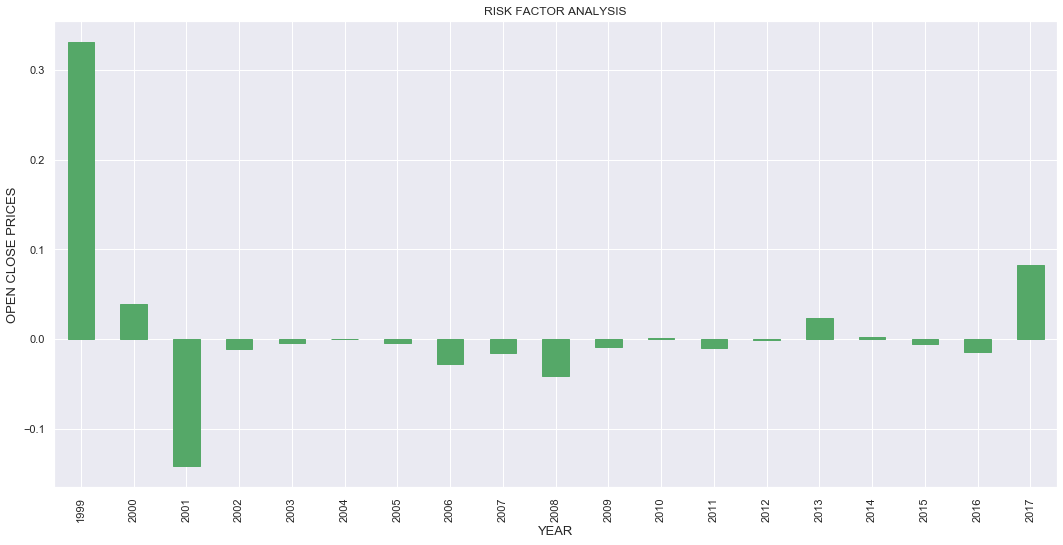

In [81]:
# Data Visualization for Risk Factor Analysis(Bar Graph)
plt.figure(figsize=(16,8))
plt.title('RISK FACTOR ANALYSIS')
test.plot(x='year', y='Open_Close', kind='bar', Color="C2") 
plt.xlabel('YEAR',fontsize=13)
plt.ylabel('OPEN CLOSE PRICES',fontsize=13)
plt.show()

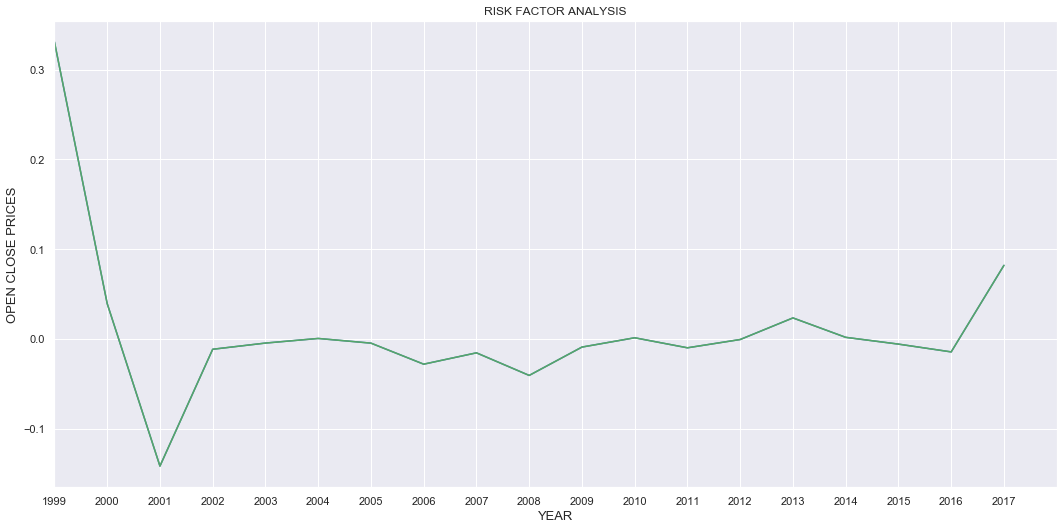

In [83]:
# Data Visualization for Risk Factor Analysis(Line Graph)
plt.figure(figsize=(16,8))
plt.title('RISK FACTOR ANALYSIS')
ax = plt.gca()
test.plot(x="year", y="Open_Close", kind="line",ax=ax)
test.plot(x="year", y="Open_Close", kind="line", ax=ax, color="C2")
plt.xlim([1999, 2018])
plt.xlabel('YEAR',fontsize=13)
plt.ylabel('OPEN CLOSE PRICES',fontsize=13)
plt.xticks(np.arange(1999,2018,1))
plt.show()